In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
cell_df = pd.read_csv('/content/Cancer Cells - cancer_cells.csv')

In [8]:
cell_df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
cell_df.tail()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [10]:
cell_df.drop('Id',axis=1,inplace=True)

In [12]:
cell_df.isnull().sum()
cell_df.isna().sum()

,0
Clump_thickness,0
Uniformity_Cell_Size,0
Uniformity_Cell_Shape,0
Marginal_Adhesion,0
Single_Epithelial_Cell_Size,0
Bare_Nuclei,0
Bland_Chromatin,0
Normal_Nucleoli,0
Mitoses,0
Class,0


In [13]:
cell_df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [14]:
target_count = cell_df.Class.value_counts()
print('Benign:', target_count[2])
print('Malignant:', target_count[4])

Benign: 458
Malignant: 241


DS is balanced as 2:1

In [15]:
458/241

1.900414937759336

In [16]:
cell_df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,object
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,object
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [20]:
cell_df = cell_df[pd.to_numeric(cell_df['Bare_Nuclei'],errors='coerce').notnull()]
cell_df['Bare_Nuclei']=cell_df['Bare_Nuclei'].astype('int')

<ipython-input-20-4ba626fae2ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['Bare_Nuclei']=cell_df['Bare_Nuclei'].astype('int')


In [21]:
cell_df.dtypes

,0
Clump_thickness,int64
Uniformity_Cell_Size,int64
Uniformity_Cell_Shape,int64
Marginal_Adhesion,int64
Single_Epithelial_Cell_Size,int64
Bare_Nuclei,int64
Bland_Chromatin,int64
Normal_Nucleoli,int64
Mitoses,int64
Class,int64


In [22]:
cell_df.shape

(683, 10)

In [23]:
cell_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_thickness,683.0,4.442167,2.820761,1.0,2.0,4.0,6.0,10.0
Uniformity_Cell_Size,683.0,3.150805,3.065145,1.0,1.0,1.0,5.0,10.0
Uniformity_Cell_Shape,683.0,3.215227,2.988581,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,683.0,2.830161,2.864562,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,683.0,3.234261,2.223085,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,683.0,3.445095,2.449697,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,683.0,2.869693,3.052666,1.0,1.0,1.0,4.0,10.0
Mitoses,683.0,1.603221,1.732674,1.0,1.0,1.0,1.0,10.0
Class,683.0,2.699854,0.954592,2.0,2.0,2.0,4.0,4.0


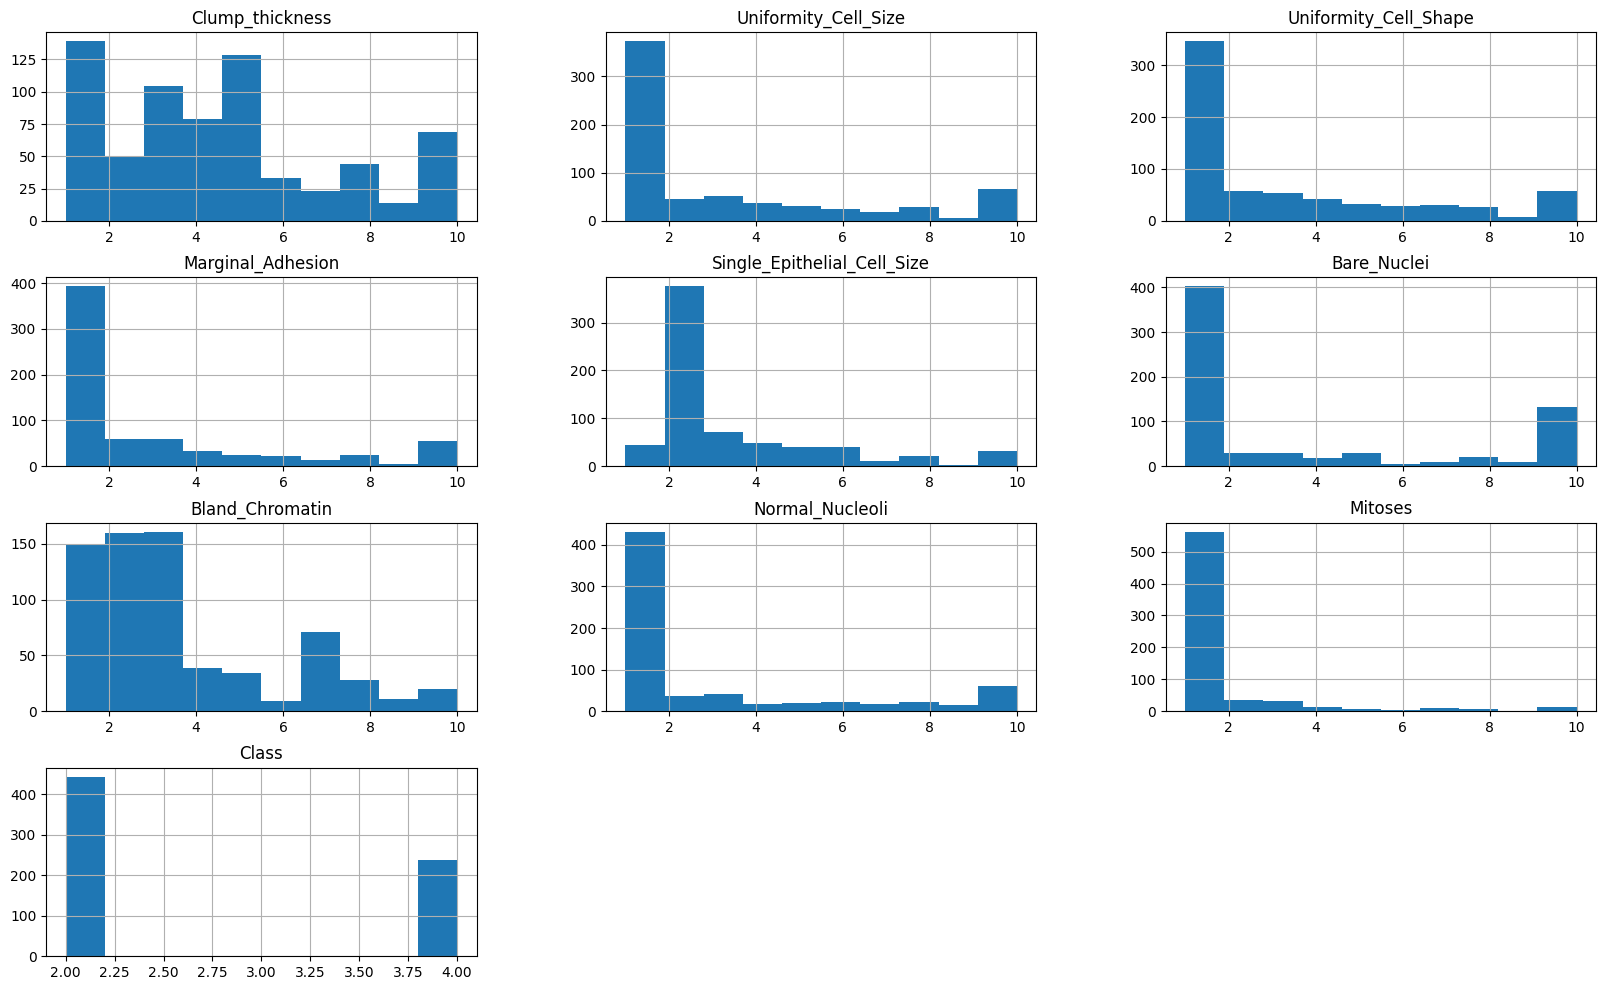

In [24]:
cell_df.hist(figsize=(20,12))
plt.show()

In [25]:
cell_df.columns

Index(['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [28]:
feature_df=cell_df[['Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size',
       'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']]
x=np.asarray(feature_df)
y=np.asarray(cell_df['Class'])

In [29]:
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
x_train.shape

(546, 9)

In [31]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=0)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
correct = (y_test == y_pred).sum()
incorrect = (y_test != y_pred).sum()
accuracy = correct / (correct + incorrect) * 100

print('\nPercent Accuracy: %0.1f' %accuracy)


Percent Accuracy: 97.1


In [32]:
prediction = pd.DataFrame()
prediction['actual'] = y_test
prediction['predicted'] = y_pred
prediction['correct'] = prediction['actual'] == prediction['predicted']

print ('\nDetailed results for first 20 tests:')
print (prediction.head(20))


Detailed results for first 20 tests:
    actual  predicted  correct
0        2          2     True
1        4          4     True
2        2          2     True
3        4          4     True
4        2          2     True
5        2          2     True
6        2          2     True
7        2          2     True
8        4          4     True
9        2          2     True
10       2          2     True
11       4          4     True
12       4          4     True
13       4          4     True
14       4          4     True
15       2          2     True
16       2          2     True
17       2          2     True
18       2          2     True
19       2          2     True


Logistic Regression

In [34]:
from sklearn.metrics import confusion_matrix
c_logistic=confusion_matrix(y_test,y_pred)
print(c_logistic)
Accuracy_logistic=sum(np.diag(c_logistic))/(np.sum(c_logistic))
Accuracy_logistic

[[86  4]
 [ 0 47]]


0.9708029197080292

In [35]:
from sklearn.naive_bayes import GaussianNB
classifier_naive=GaussianNB()
classifier_naive.fit(x_train, y_train)
y_predict=classifier_naive.predict(x_test)

Naive Bayes Model

In [37]:
from sklearn.metrics import confusion_matrix
c_naive=confusion_matrix(y_test,y_predict)
print(c_naive)
Accuracy_naive=sum(np.diag(c_naive))/(np.sum(c_naive))
Accuracy_naive

[[83  7]
 [ 0 47]]


0.948905109489051

In [38]:
from sklearn import svm
classifier_svm=svm.SVC(kernel='linear',gamma='auto',C=1)
classifier_svm.fit(x_train,y_train)
y_predict=classifier_svm.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix
c_svm=confusion_matrix(y_test,y_predict)
print(c_svm)
Accuracy_svm=sum(np.diag(c_svm))/(np.sum(c_svm))
Accuracy_svm

[[85  5]
 [ 0 47]]


0.9635036496350365

KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier


classifier_knn=KNeighborsClassifier(n_neighbors=6,metric="minkowski",p=2)
classifier_knn.fit(x_train,y_train)
y_predict=classifier_knn.predict(x_test)

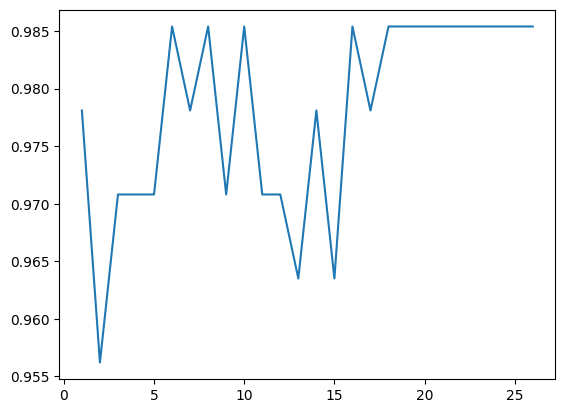

In [41]:


n=[]
acc=[]

for i in range(1,27):
    classifier_knn_trail=KNeighborsClassifier(n_neighbors=i,metric="minkowski",p=2)
    classifier_knn_trail.fit(x_train,y_train)
    c_knn_trail=confusion_matrix(y_test,classifier_knn_trail.predict(x_test))
    acc.append(sum(np.diag(c_knn_trail))/(np.sum(c_knn_trail)))
    n.append(i)
n=np.array(n)
acc=np.array(acc)
plt.plot(n,acc)
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix
c_knn=confusion_matrix(y_test,y_predict)
print(c_knn)
Accuracy_knn=sum(np.diag(c_knn))/(np.sum(c_knn))
Accuracy_knn

[[88  2]
 [ 0 47]]


0.9854014598540146

Descision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)# for gini 0.948905109489051
classifier_tree.fit(x_train, y_train)


y_predict = classifier_tree.predict(x_test)

In [45]:

from sklearn.metrics import confusion_matrix
c_tree=confusion_matrix(y_test,y_predict)
print(c_tree)
Accuracy_tree=sum(np.diag(c_tree))/(np.sum(c_tree))
Accuracy_tree

[[87  3]
 [ 2 45]]


0.9635036496350365

In [46]:

from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        90
           4       0.94      0.96      0.95        47

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier_ensemble = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_ensemble.fit(x_train, y_train)


y_predict = classifier_ensemble.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix
c_ensemble=confusion_matrix(y_test,y_predict)
print(c_ensemble)
Accuracy_ensemble=sum(np.diag(c_ensemble))/(np.sum(c_ensemble))
Accuracy_ensemble

[[87  3]
 [ 0 47]]


0.9781021897810219

We can see KNN performing well and then comes random fores which have more accuracy and F1 Score as well.